In [1]:
import os, sys
import numpy as np

In [2]:
import corner as DFM 
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# 1. read encoded SDSS spectra and ivar

In [3]:
dat_dir = '/scratch/network/chhahn/sedflow'
A_spec_sdss = np.load(os.path.join(dat_dir, 'sdss.clean.norm_spec.npy'))[:,None]
h_spec_sdss = np.load(os.path.join(dat_dir, 'sdss.clean.h_spec.npy'))
A_ivar_sdss = np.load(os.path.join(dat_dir, 'sdss.clean.norm_ivar.npy'))[:,None]
h_ivar_sdss = np.load(os.path.join(dat_dir, 'sdss.clean.h_ivar.npy'))
zred_sdss = np.load(os.path.join(dat_dir, 'sdss.clean.zred.npy'))[:,None]

In [4]:
data_sdss = np.concatenate([A_spec_sdss, h_spec_sdss, A_ivar_sdss, h_ivar_sdss, zred_sdss], axis=1)

In [5]:
ranges = [np.nanquantile(col, (0.01, 0.99)) for col in data_sdss.T]

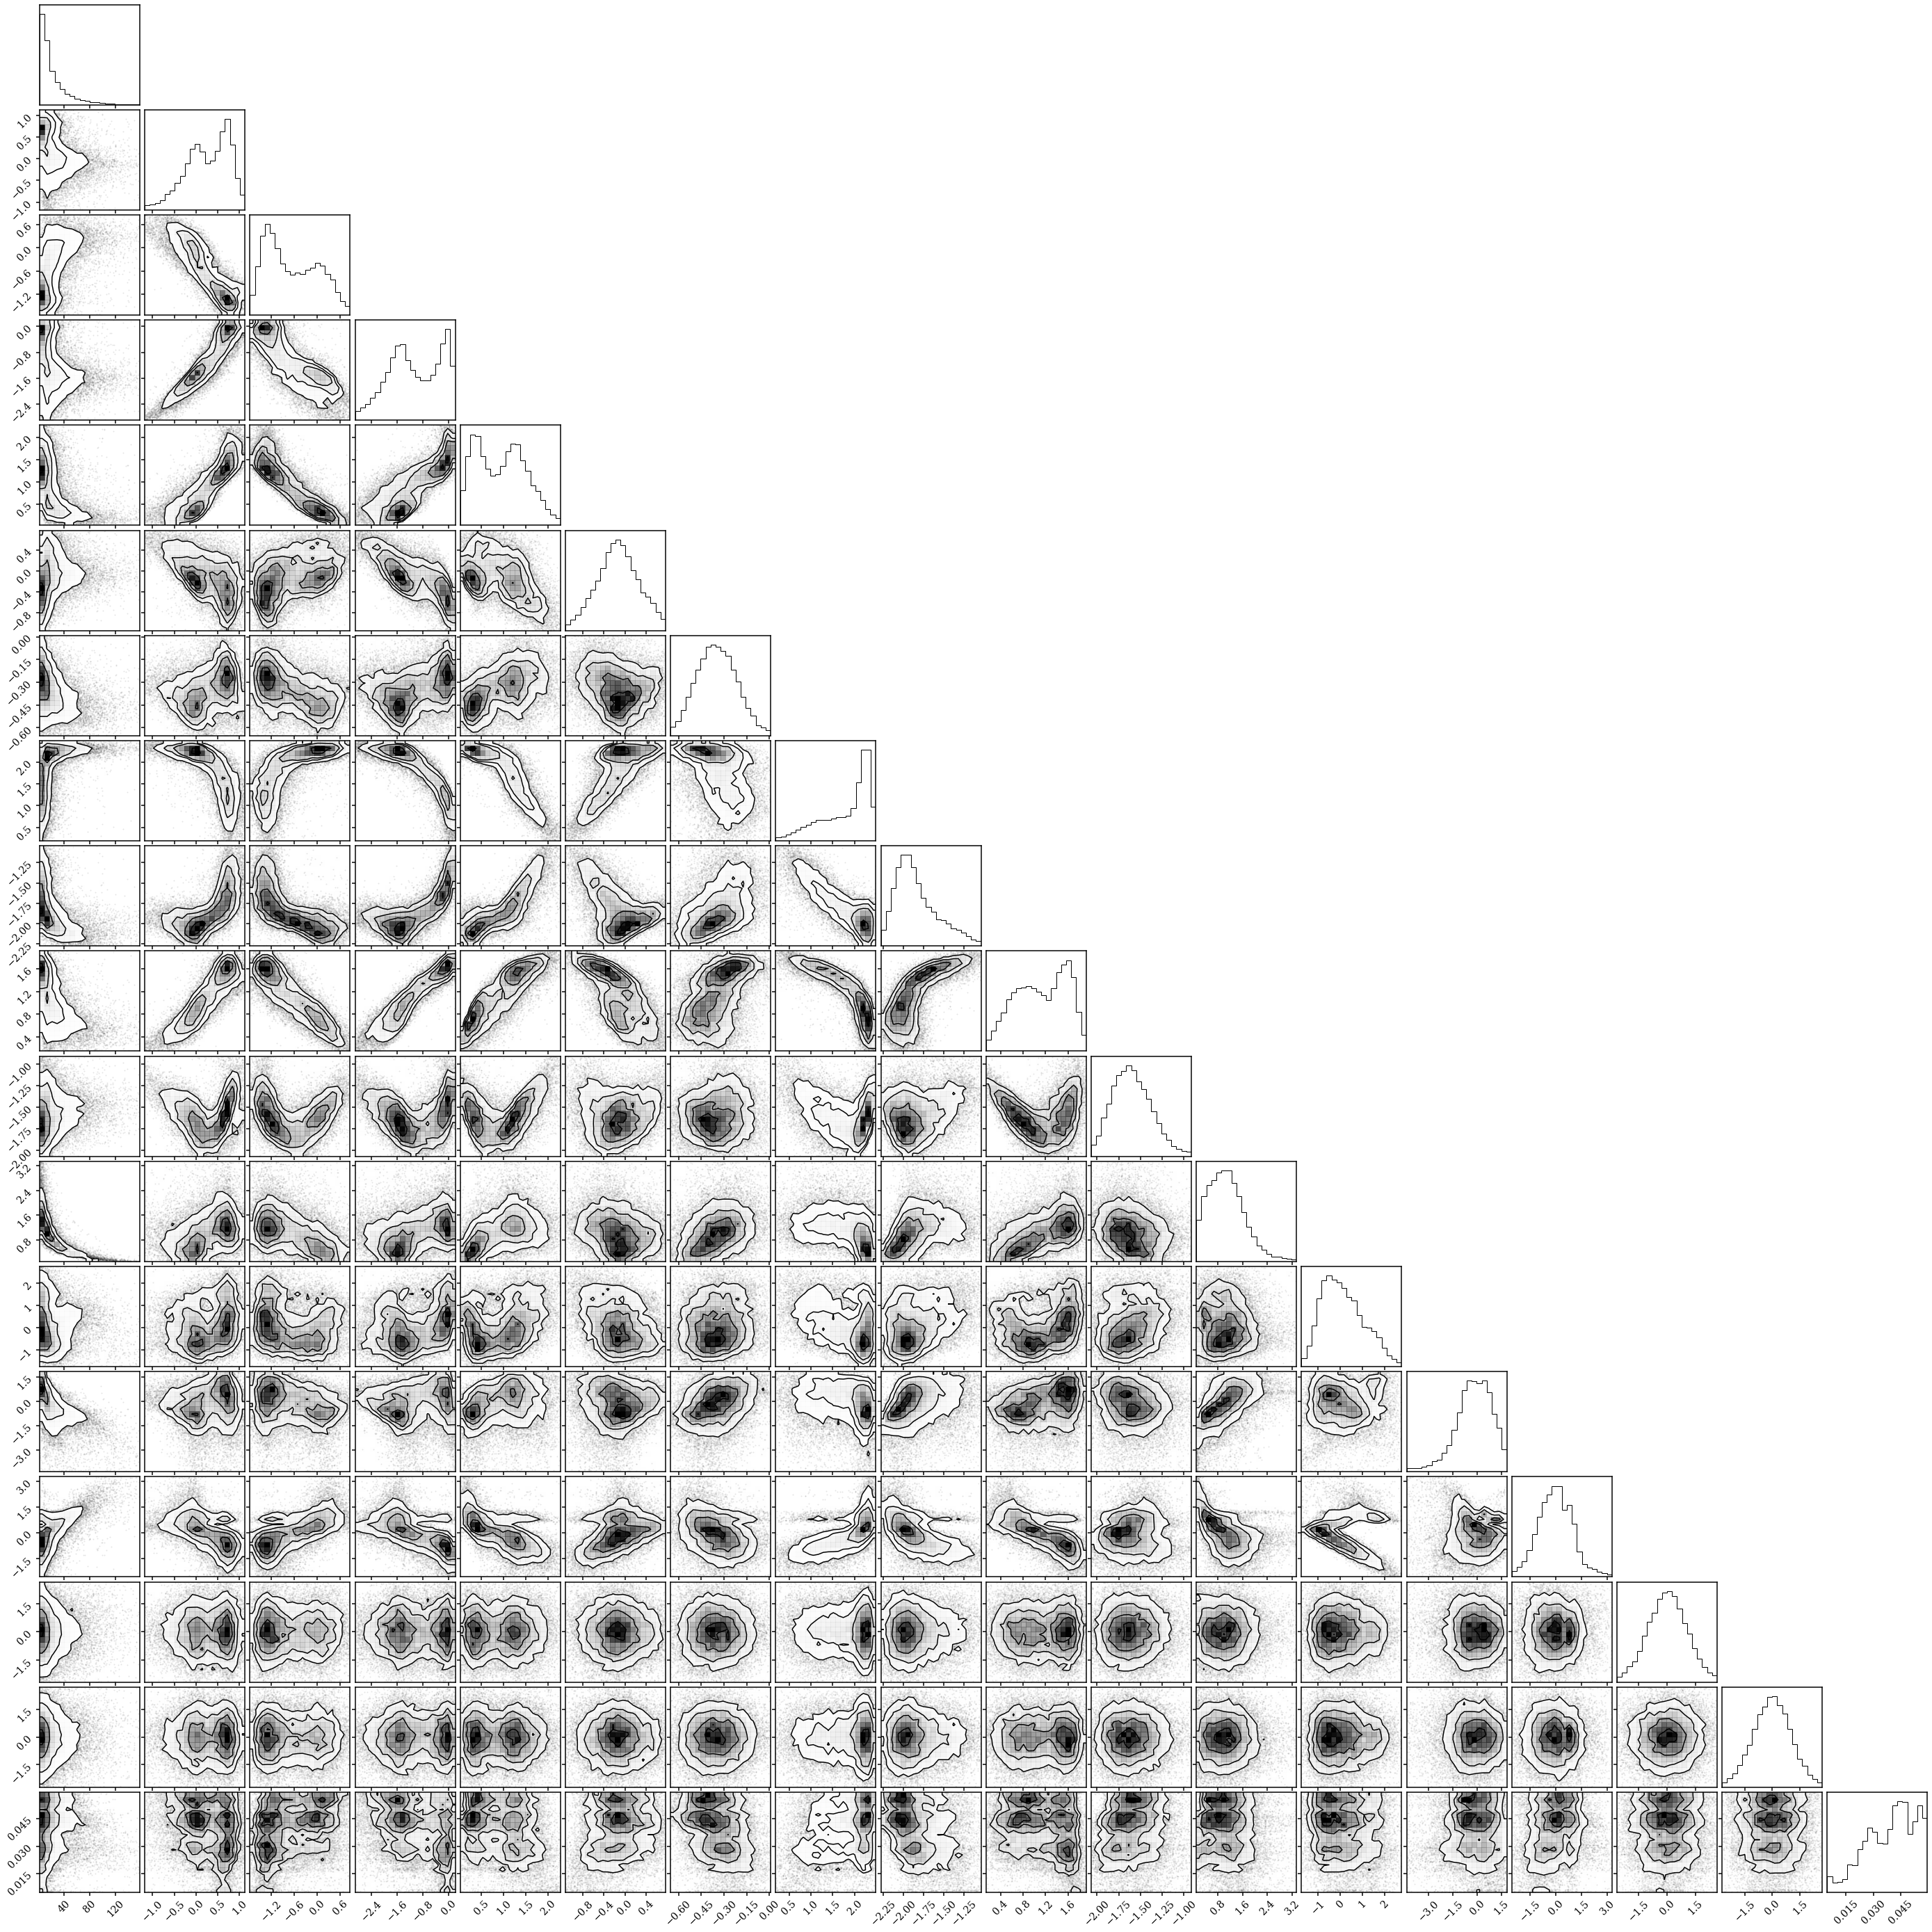

In [6]:
fig = DFM.corner(data_sdss, range=ranges)

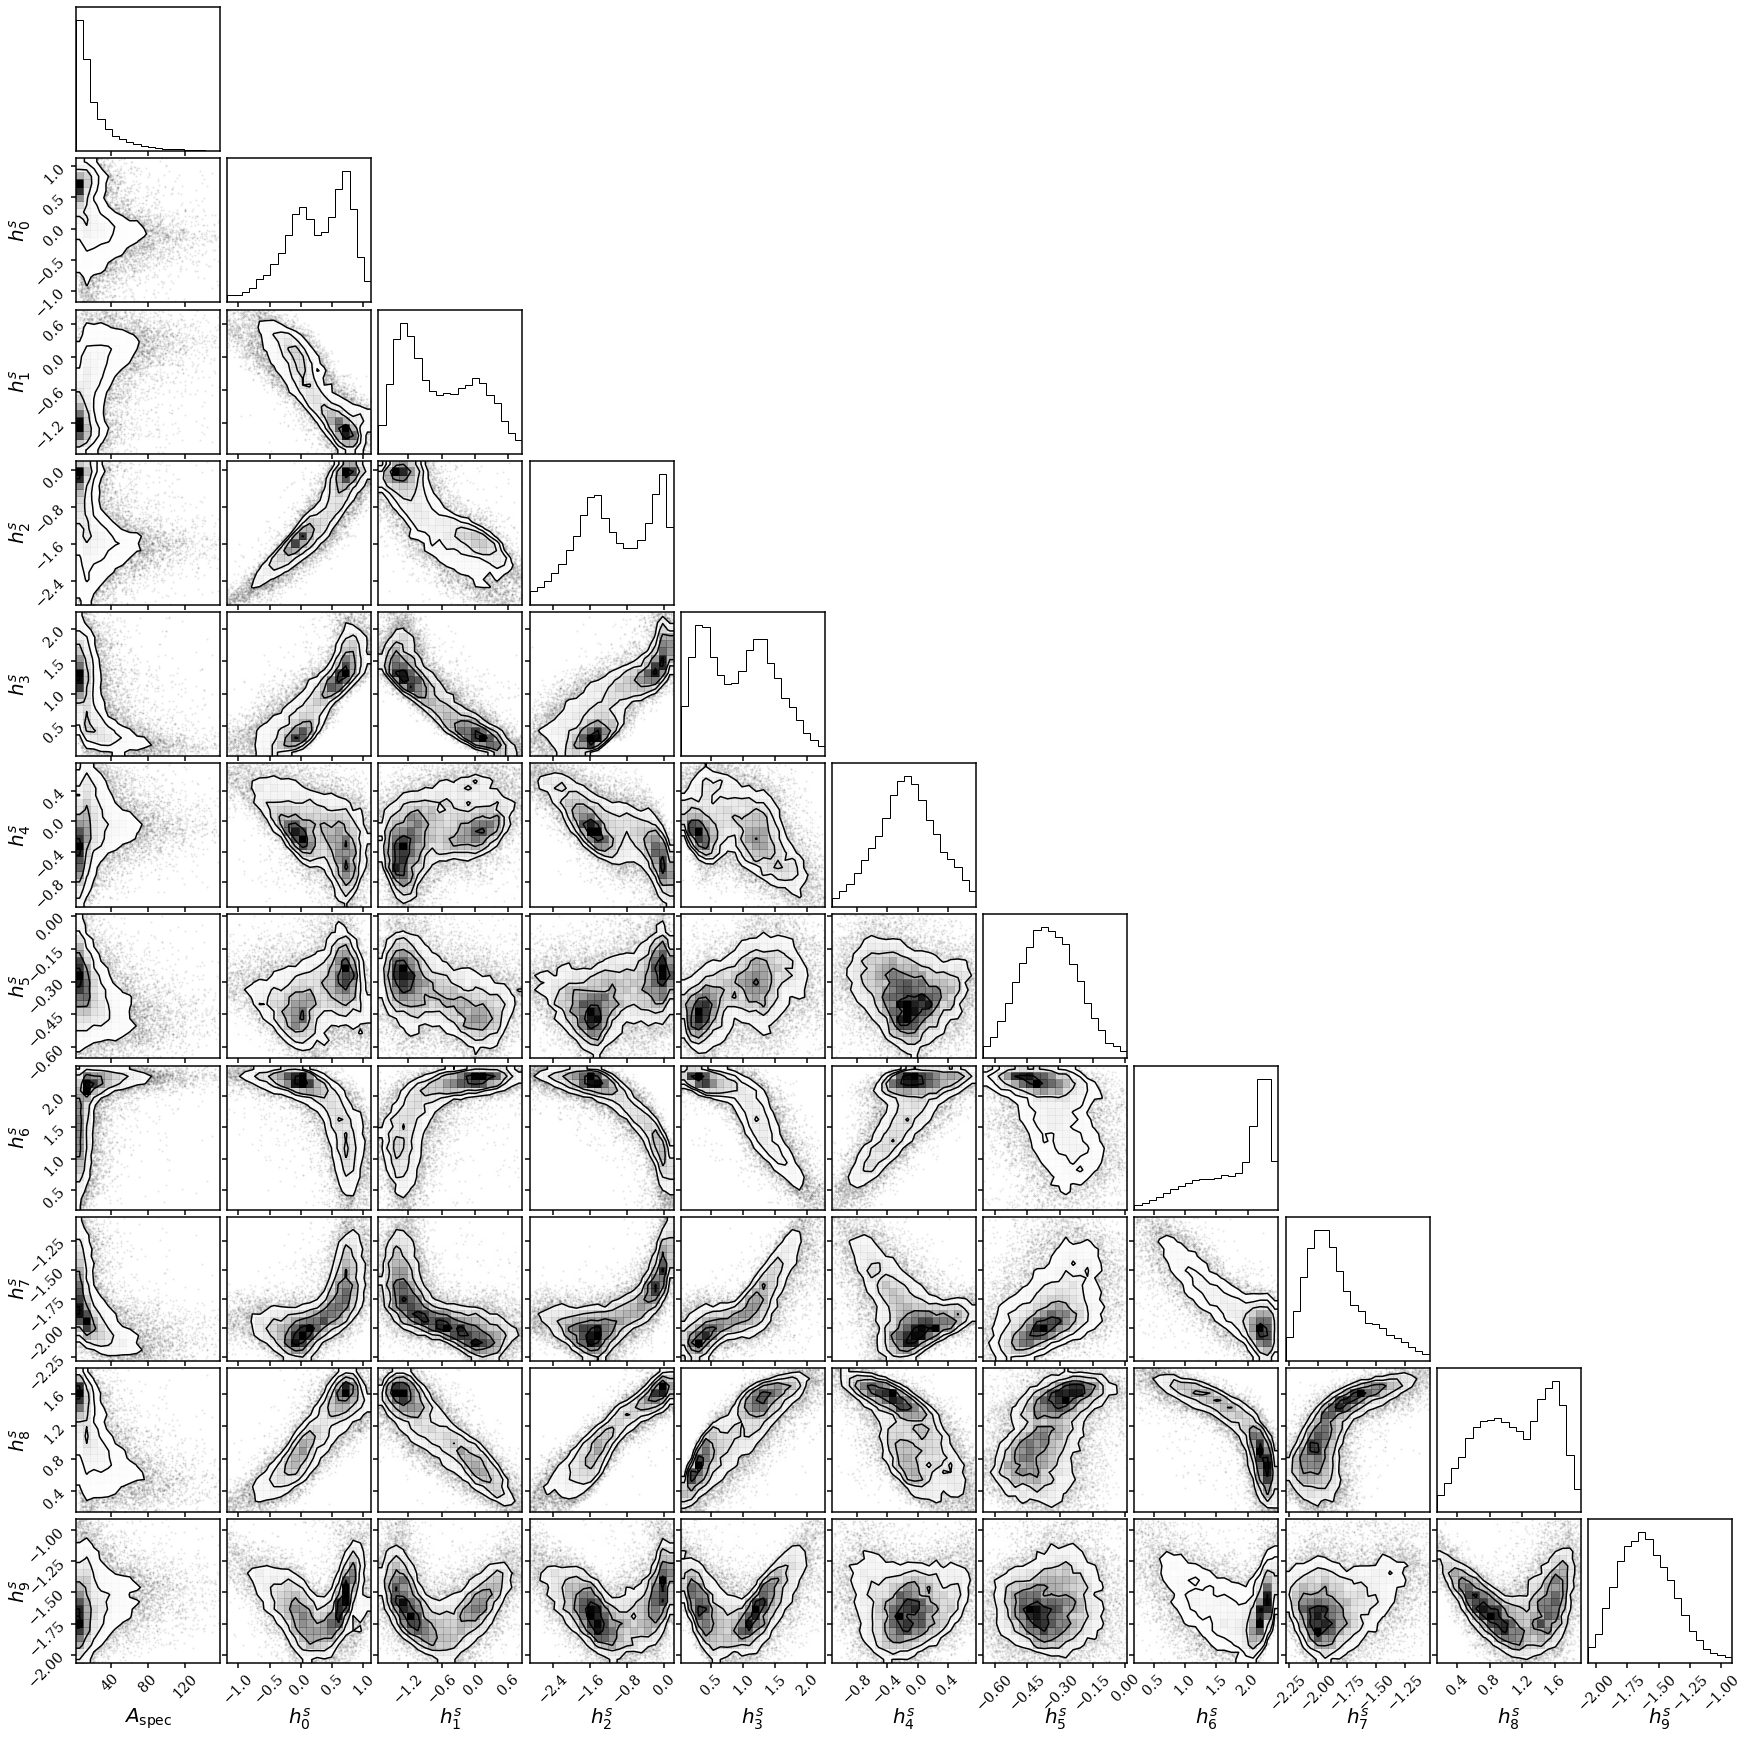

In [7]:
fig = DFM.corner(data_sdss[:,:11], range=ranges[:11], 
                 labels=[r'$A_{\rm spec}$'] + [r'$h^s_%i$' % i for i in range(10)], 
                 label_kwargs={'fontsize': 20})

# 2. read encoded training spectra and ivar

In [8]:
A_spec_train = np.load(os.path.join(dat_dir, 'sedflow_p.train.v0.1.norm_spec.npy'))[:,None]
h_spec_train = np.load(os.path.join(dat_dir, 'sedflow_p.train.v0.1.h_spec.npy'))
A_ivar_train = np.load(os.path.join(dat_dir, 'sedflow_p.train.v0.1.norm_ivar.npy'))[:,None]
h_ivar_train = np.load(os.path.join(dat_dir, 'sedflow_p.train.v0.1.h_ivar.npy'))
zred_train = np.load(os.path.join(dat_dir, 'sedflow_p.train.v0.1.zred.npy'))[:,None]

In [9]:
data_train = np.concatenate([A_spec_train, h_spec_train, A_ivar_train, h_ivar_train, zred_train], axis=1)

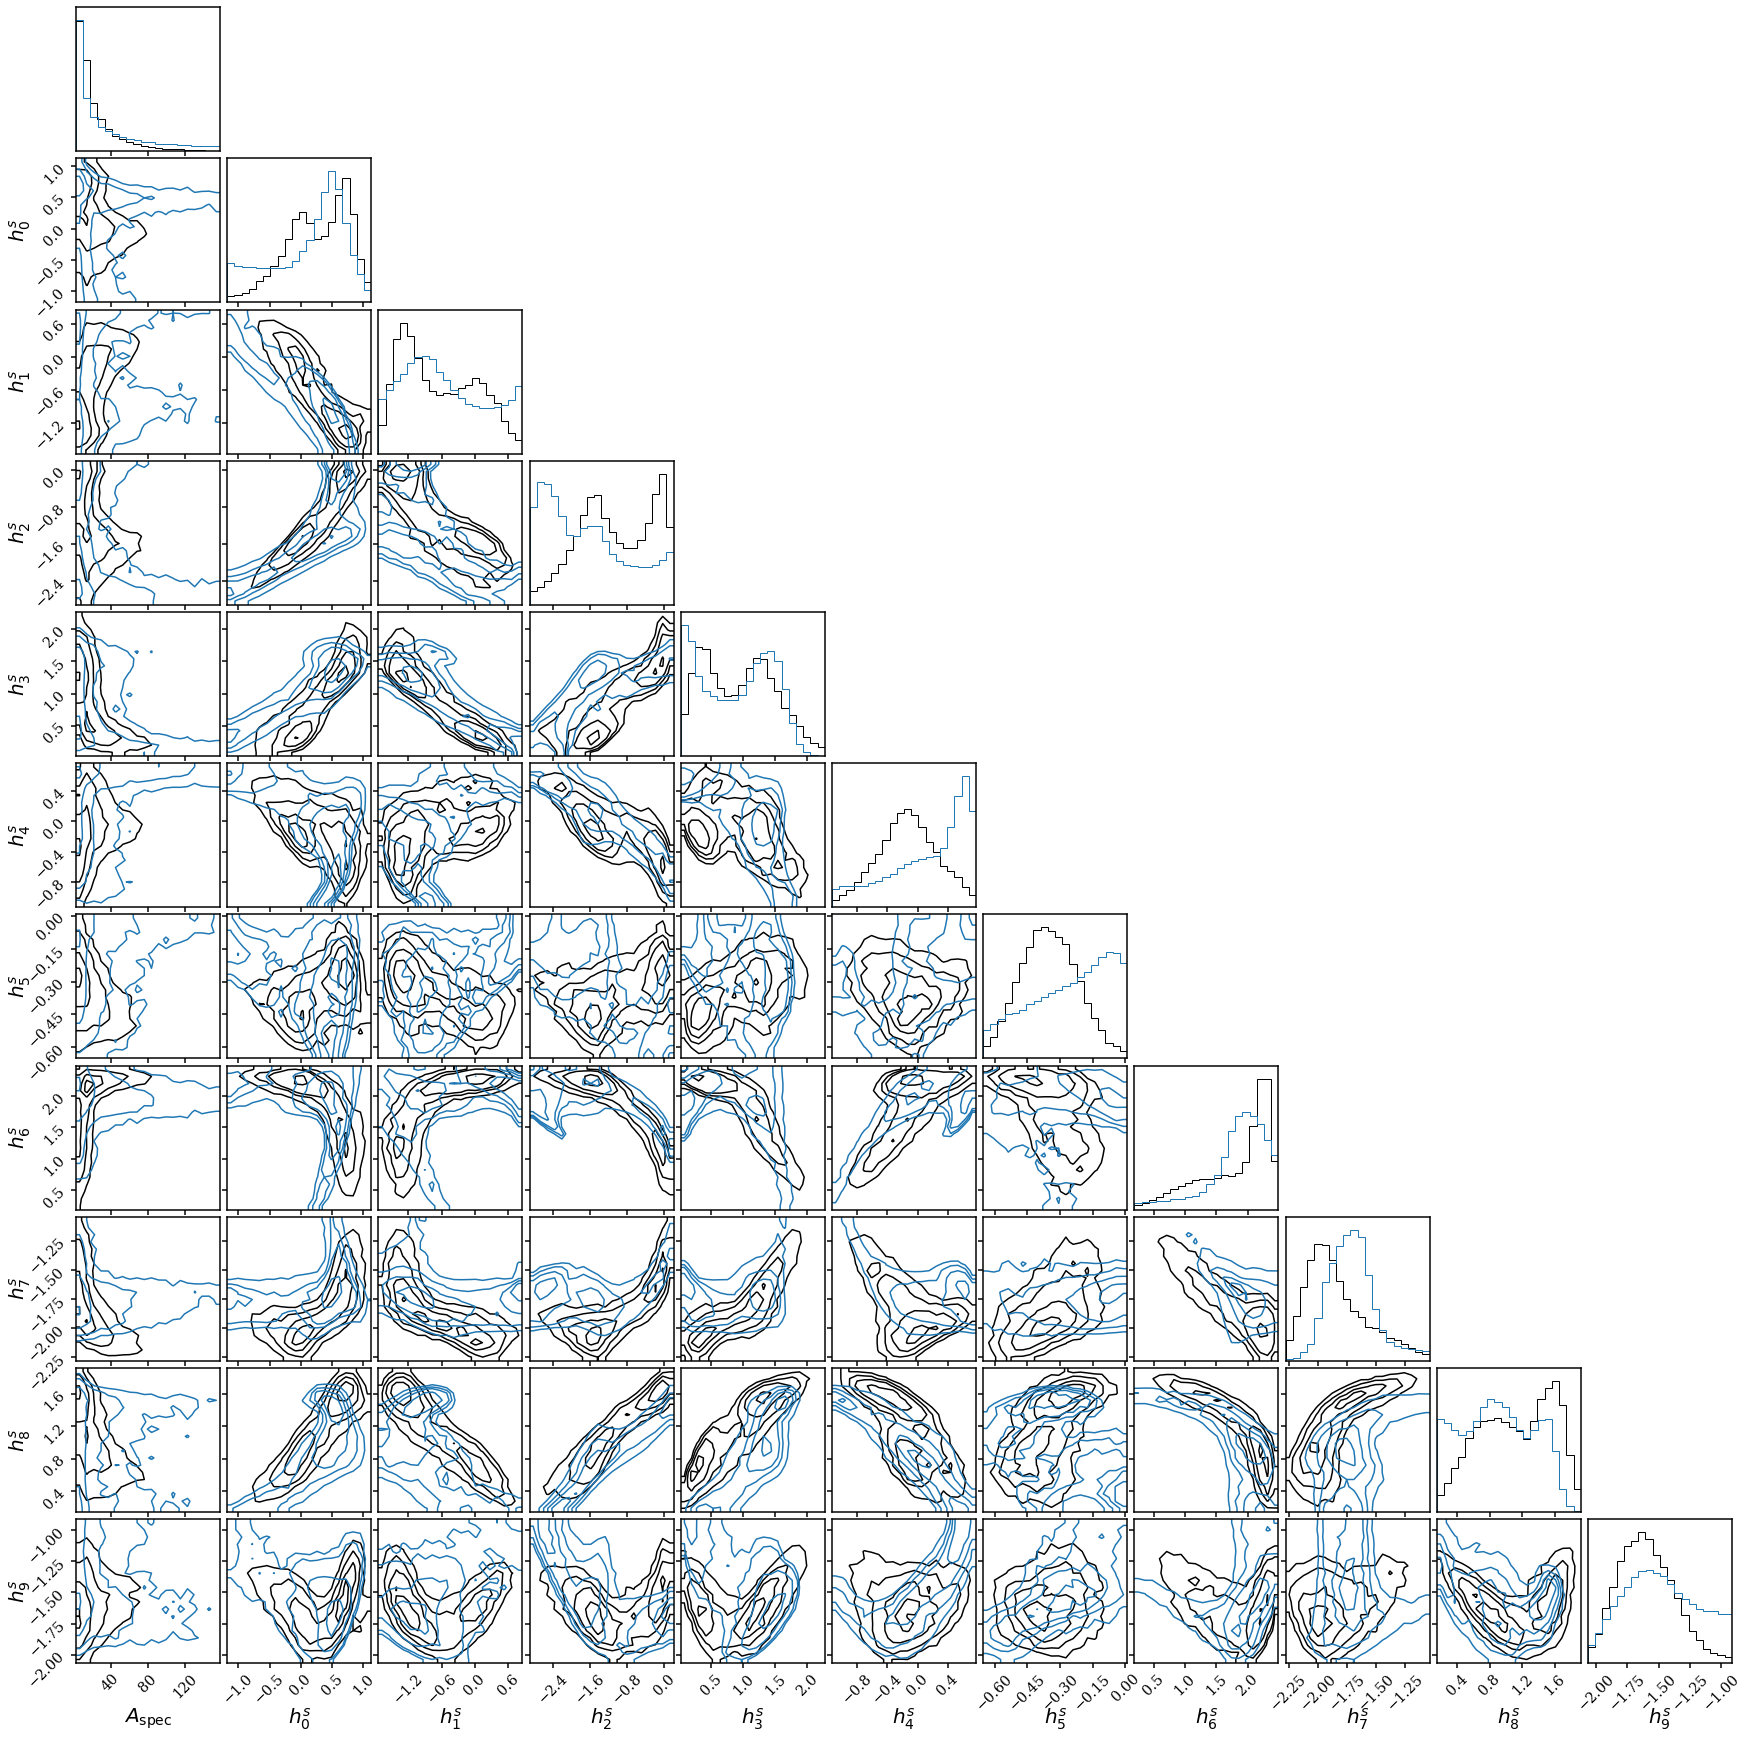

In [10]:
fig = DFM.corner(data_sdss[:,:11], range=ranges[:11], 
                 hist_kwargs={'density': True},
                 plot_datapoints=False, plot_density=False)

_ = DFM.corner(data_train[::10,:11], range=ranges[:11], color='C0',
               hist_kwargs={'density': True},
               plot_datapoints=False, plot_density=False,
               labels=[r'$A_{\rm spec}$'] + [r'$h^s_%i$' % i for i in range(10)], 
               label_kwargs={'fontsize': 20}, fig=fig)

The overlap is not great but good enough